# Convolutional Neural Networks
## Prequisites
### What we are going to do 
- Focus on foundational concepts in convolutional neural networks
- Focus on CNNs for computer vision
    - This is primarily a classification problem
    - We'll touch on feature extraction too
- Basic implementation of methods (tensorflow and keras)
    - Cursory discussion of Tensorflow and Keras
    - Building a primitive CNN on DIGITS
    - Importing state of the art
### What we are not going to do
- Basics of neural networks (covered this last time), this includes:
    - Foundational machine learning and mathematical concepts
    - Basic neural network architectures 
    - Training methods
- Setting up your notebooks and using AWS


# Limitations of traditional methods
## Limitations of traditional machine vision
- Feature engineering is too heavy
- Example: classic approach for learning faces
  - Approach:
      - Would design filters (feature vectors)
      - Combine machine learning + human logic
      - Would take a lot of curation to get appropriate filters (would need to select 100 to 1000s)
  - What was being done:
      - The collection of engineered featured represented a lower dimensional representation of the same-problem
  - Viola-Jones (2001)
      - Idea slide edge detectors across 
      - Certain pieces would be 'activated'
      - When a certain combination of edge detectors are activated use a boosting algorithm to classify them as a face 
       <tr>
            <td> <img src="./Pictures/edgeDetectors2.png" alt="Edge Detector" style="width: 200px;"/> </td>
            <td> <img src="./Pictures/edgeDetectors.jpg" alt="Edge Detector" style="width: 200px;"/>  </td>
       </tr>
      - Limitations of Viola-Jones approach:
          - Different lighting
          - Covered faces
          - Faces in different positions (not looking directly) -> would require a different set of filters
- Central limitation of classic methods:
    - Were not learning representations of faces
    - Required human input everytime a new object class needed to be added (i.e. a cat)
- ImageNet challenge:
    - Set the foundation for a shift in the way in which computer vision is conducted
    - 450,000 images, with 200 classes
    - Given 5 chances to get the right class
    - The rise of AlexNet in 2012 (16.1% accuracy) was 10\% better than state of the art
        - Note: AlexNet comes from Alex Krizhevsky from Geoffrey Hinton's lab
    - Laid foundations for deep learning
        - Created a shift in 50 years of classical machine learning
    - Stopped running Imagenet after 2015 because had exceeded human level accuracy
      <img src="./Pictures/imagenet.png" alt="ImageNet" style="width: 400px;"/>

## Limitations of neural networks
- Goal of deep learning is representational learning
    - We layer networks to create richer structures
- Fully connected networks don't scale well
    - Memory constraints limit depth
    - Representational richness is mitigated with each layer (we end up memorizing rather than 'learning')
    - Fully connected layers have diminishing returns beyond 3 layers
 - Example: 
     - For the input layer of a neural network we require :
         - MNIST : 28x28x1 = 784 weights
         - Image (small): 200 x 200 x 3 = 120,000
      - As we add a second fully connected layer (assuming same structure for simplicity):
          - MNIST: $784\times784=614656$
          - Image (small): $120,000 \times 120,000= 1.44 10^10$ weights
      - Assuming each weight occuped a 4 bytes then our weights for only 2 layers occupy:
          - MNIST: $4bytes\times 614656/(10^6bytes/Mb)=2.45$Mbs
          - Image (small): $4bytes\times 1.44 10^10/(10^9bytes/GB)=57.6$Gbs

## Solution to scaling
- Given we are working with a known structure (image) we structure our network to use the inherent spatial relations through convolutions
- Convolutional networks take advantage of the inherent structure of images to reduce the number of require parameters (weights) in the network while learning representations
      

# New architectures - some history
- Convolutional networks - proposed in 1989 by LeCun
- Special network for processing grid-like topologies, including:
    - 1-D Topologies: Time series, wav files 
    - 2-D Topologies: Images
    - 3-D Topologies: Volumes (voxels in cat scans)
- Successful application of insights obtained from studying the brain applied to the realm of machine learning
- First successful application of deep learning
- Set the stage for commercial applications
    - In the 1990s the neural network group at At&T developed a CNN to read chcecks
    - Deployed into production by NEC
    - By the end of 1990s 10\% of checks were being read by this network
- Could successfully run back-propagation and tune hyperparameters on larger networks because were more efficient
- For a while neural networks fell out of favor in the 90's
    - CNNs success during this time period allowed the field to continue growing


# What is a filter?
- In previous session we saw activation maps for neural networks acted as filters to activate or down-regulate a signal
    - Filters are like cookie cutters that are put through an extruder
    - Saw examples ealier of Haar filters for Viola-Jones, i.e. they activate when they cover a specific region like a nose or eyes
<img src="./Pictures/haarNose.jpg" alt="Haar Feature Detector" style="width: 200px;"/> 

- Filters can be used in several ways
    - In the Viola-Jones case they are used as feature detectors which are then fed into a boosting algorihtm that classifies faces faces
    - Filters can be used for edge detection as well
    - When filters are convoled or layered on top of one another they can also be generative
- Note:
    - Recall an image is simply as set of numbers in a matrix
    - When we think about images here we're actually tginking about matrices
<img src='./Pictures/imagePixels.png' alt='Matrix of pixels' width='50%' />

## Example: Gaussian Filter
- The way filters work is that they are applied to a __receptive field__ of the image
     - Depending on the size of the __filter__, __ zero-padding__ and __stride__ the resulting image may be smaller or stay the same size
- Filter's are used in several common applications including photoshop, html and on your phone to enhance or distort an image
    - When we think of filters we can apply several of them simultaneously
    - They are applied across the image to generate an affect
    - There will be a black border around the image
        - These are areas where we are interpolating from the edge
        - This gives some intuition as to how our activation maps will work
- Steps in python    
    1. Load image
    2. Make image gray
    3. Show filter
    4. Convolve with filter
    5. Show difference between 0 padding and some padding.

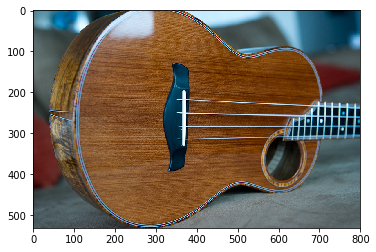

The total shape is using the argument="same" (532, 800, 3)


In [3]:
# ======================
#  Gaussian Blur
# ======================
# Here we are going to apply a 2d Gaussian blur to our images
# ============================
# Loading standard libraries
# ============================
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# ============================
# Loading Lena image
# ============================
# 
# This image is used because of it's high-contrast
# edges and contours 

img = mpimg.imread('pics/redwood-ukulele-top.jpg')
plt.imshow(img)
plt.show()
print('The total shape is using the argument="same" {}'.format(img.shape))

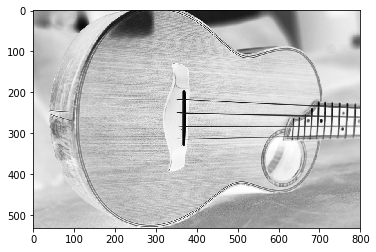

In [4]:
# ============================
# Making image black and white
# ============================
# Convolution here is only defined for black and white images
bw = img.mean(axis=2)
plt.imshow(bw, cmap='Greys')
plt.show()

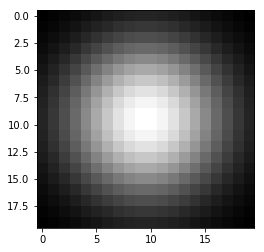

In [6]:
# ============================
# Creating the gaussian filter
# ============================
# Here we are going create a 20x20 filter
W = np.zeros((20,20))

for i in range(20):
	for j in range(20):
		dist = (i - 9.5)**2 + (j - 9.5)**2  
		W[i,j] = np.exp(-dist/50)

# plotting the filter
plt.imshow(W, cmap='gray')
plt.show()

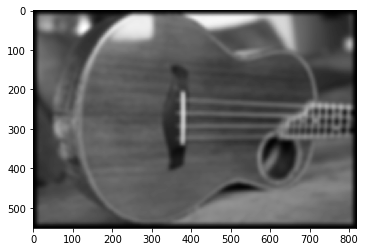

The total shape is (551, 819)


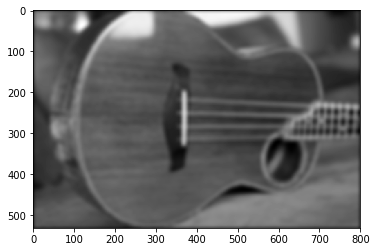

The total shape is using the argument="same" (532, 800)


In [7]:
# ============================
# Convolving the 2d space
# ============================
out = convolve2d(bw,W)
plt.imshow(out, cmap='gray')
plt.show()
# output shape is different due to smoothing around edges
print('The total shape is {}'.format(out.shape)) #551*819
      
# To sensure that we have the same size we use the additional
# arugment mode='same'
out = convolve2d(bw,W, mode='same')
plt.imshow(out, cmap='gray')
plt.show() # 532*800
print('The total shape is using the argument="same" {}'.format(out.shape))

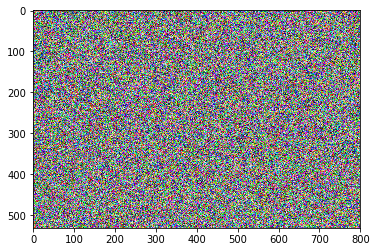

In [10]:
# =======================================
# Running filter on all 3 color channels
# =======================================
out3 = np.zeros(img.shape)
for i in range(3):
	out3[:,:,i]=convolve2d(img[:,:,i], W, mode='same')
# Doesn't really look like anythingx
plt.imshow(out3)
plt.show()

## Sobel operators
- Why are they useful
    - Sobel operators are filters that approximate the __gradient__ or change in direction of the pixels in the horizontal and vertical directions
    - The resulting filters are used as edge detectors
        - Edge detection allows us to segment an image into different pieces
        - In modern applications once edges are detected we can classify objects by their shapes
    <img src="./Pictures/edgeDetection.jpg" alt="Edge Detector" style="width: 500px" />

- Implementation
    - Operator uses a $3\times 3$ kernel to __convolve__ with original image
    - Here we are going to implement an edge detector using the Sobel operator
    - The Sobel Operator acts on the __source image__ $A$ as follows:
    $$
    G_x=\underbrace{\begin{bmatrix}1&0&-1\\2&0&-2\\&1&0&-1\end{bmatrix}}_{H_x}\ast A\qquad G_y=\begin{bmatrix}1&2&1\\0&0&0\\-1&-2&-1\end{bmatrix}_{H_y}\ast A
    $$
    where $\ast$ is the convolution operator (more on this later)
    - Notes:
        - Each kernel can be decomposed into vector multiplication, making their computation efficient:
    $$
    \begin{bmatrix}1&0&-1\\2&0&-2\\&1&0&-1\end{bmatrix}
    =\begin{bmatrix}1\\2\\1\end{bmatrix}
    \begin{bmatrix}1&0&-1\end{bmatrix}
    $$
        - We can approximate the __gradient magnitude__ and __direction__ as follows
     $$
     G=\sqrt{G_X^2+G_y^2}\qquad \theta=\arctan\left(\frac{G_y}{G_x}\right)
     $$
- Implementation in Python
    - In what follows we'll convolve the Sobel operator with an image
    - We apply in individually in the $x$ and $y$ direction
    - This will give us edge detectors along those accesses, they are then combined
    - We slide the $3\times 3$ matrix $H_x$ NS $H_y$ across the image

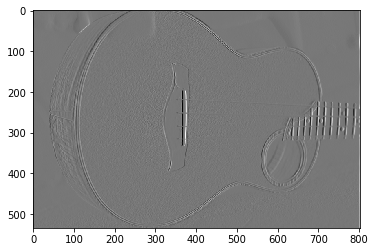

In [11]:
# ====================
# Edge detection
# ====================
# Sobel operator
# Approximates gradients in x and y direction
Hx = np.array([
	[-1, 0, 1],
	[-2, 0, 2],
	[-1, 0, 1]
	], dtype=np.float32)
Hy = Hx.T  

# Detects horizontal edges
Gx = convolve2d(bw, Hx)
plt.imshow(Gx, cmap='gray')
plt.show()

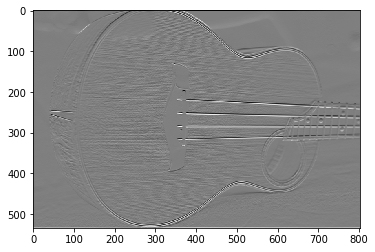

In [12]:
# Detects vertical edges
Gy = convolve2d(bw, Hy)
plt.imshow(Gy, cmap='gray')
plt.show()
# Applying in both the vertical and horizontal 
# Since the graident is directional in x and y
# we can calculate the approximate direction 
# of the gradient from the Sobol operators
G = np.sqrt(Gx**2 + Gy**2)

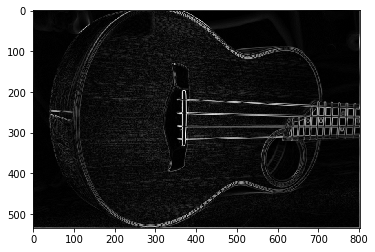

In [13]:
# Detecting the edges
plt.imshow(G,cmap='gray')
plt.show()

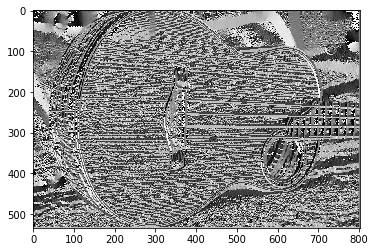

In [14]:
# We can plot the gradients direction
theta = np.arctan2(Gy,Gx)
plt.imshow(theta,cmap='gray')
plt.show()

## Learning filters
- So why are we interested in filters?
- Our goal with convolutional neural networks is two fold:
    1. Learn different types of filters and
    2. Compose them together to form representation maps
    3. Example from [gimp](https://docs.gimp.org/en/plug-in-convmatrix.html)
<img src='./Pictures/convolution-calculate.png' alt='Convolution Example' />
<table>
    <tr>
        <th> Image Transformation</th>
        <th> Matrix Transform </th>
    </tr>
    <tr>
        <td><img src='./Pictures/g1.jpg' alt='sharpen' width='50%'/></td> 
        <td>$\begin{bmatrix}0&-1&0\\ -1&5&-1\\ 0&-1&0\end{bmatrix}$</td>
    </tr>
    <tr>
        <td><img src='./Pictures/g2.jpg' alt='blur' width='50%'/></td> 
        <td>$\begin{bmatrix}1&1&1\\ 1&1&1\\ 1&1&1\end{bmatrix}$</td>
    </tr>
    <tr>
        <td><img src='./Pictures/g3.jpg' alt='edge enhance' width='50%'/></td> 
        <td>$\begin{bmatrix}0&0&0\\ -1&1&0\\ 0&0&0\end{bmatrix}$</td>
    </tr>
    <tr>
        <td><img src='./Pictures/g4.jpg' alt='edge detect' width='50%'/></td> 
         <td>$\begin{bmatrix}0&1&0\\ 1&4&1\\ 0&1&0\end{bmatrix}$</td>
    </tr>
    <tr>
        <td><img src='./Pictures/g5.jpg' alt='emboss' width='50%'/></td> 
         <td>$\begin{bmatrix}-2&-1&0\\ -1&1&1\\ 0&1&2\end{bmatrix}$</td>
    </tr>
</table>
- When these filters are combined they will form representational maps and in some-sense provide a lower-dimensional embedding of how objects representations
    - Think PCA (kinda of)
- Once these filters are learnt they can be used for feature detection, edge detection, classification or or passed into a different algorithm

## Neuroscientific basis
<figure>
    <img src="https://neurdiness.files.wordpress.com/2018/05/screenshot-from-2018-05-17-20-24-45.png" />
    <caption> CNNs function in a similar way to the visual cortex</caption>    
</figure>

## What is a convolution?
- The definition we use here for convolution is different from the strictest form of convolution in mathematics which requires positive definiteness
- We therefor find that our definition of filters will fit into the mathematical ones but not necessarily vice versa
### Mathematical definition
- The mathematical definition of a filter is a form of weighted average over a local area
- Examples:
    - Suppose that $K$ represents our convolutional kernel with __receptive field__ 3
        - In $1-D$ (time-series, audio):
            - Example 1:
                - Suppose we have a laser sensor that is noisy 
                - We'd like a more stable estimate of the laster's location
                - We can do this by averaging several measurements by giving more weight to recent measurements
                    - If we apply this averaging at every moment we obbtain a new function
                - $K=\{\omega_1,\omega_2,\omega_3\}$ such that $0\leq\omega_i\leq1$ and $\sum_{\omega_i}=1$
            - Example 2:
                - We can add an echo to a wav (time-series) by convolving past weights of our time-series
                - Consdier a simplified example where we convolve $K$ (for some accoustic effect) with the time-series frequencies $X=\{X_{-1},X_{-2},X_0,X_1,X_2\}$ 
                - Then we have:
                $$
                Y = K\ast X = \sum_{j=0}^2\omega_jX_{i-j}
                \begin{cases}
                Y_1=\sum_{j=0}^2\omega_jx_{0-j}=\omega_0x_0+\omega_1x_{-1}+\omega_2x_{-2}\\
                Y_2=\sum_{j=0}^2\omega_jx_{1-j}=\omega_0x_1+\omega_1x_{0}+\omega_2x_{-1}\\
                Y_3=\sum_{j=0}^2\omega_jx_{2-j}=\omega_0x_2+\omega_1x_{1}+\omega_2x_{0}\\
                Y_4=...=Y_8
                \end{cases}
                $$
                - $Y$ is a vector because we slide over the values of $X$ (plot image)
                - For values of where $x_i$ is undefined the convolution does not exist
                - The resulting output $Y_i$ will be smaller than the intial input $X_i$
        - In 2-D (images):
            - For a $3\times 3$ kernel we have: 
            $$
            K=\begin{bmatrix}\omega_{11},\omega_{12},\omega_{13}\\ 
            \omega_{21},\omega_{22},\omega_{23}\\
            \omega_{31},\omega_{32},\omega_{33}
            \end{bmatrix}
            $$ 
<img src='./Pictures/convolve.png' alt='convlution1' width='50%'/>
<img src='./Pictures/convolve2.png' alt='convolution2' width='75%'/>


- Mathematical definition
    - We define the convolution of the function $x(t)$ in continuous time with a weighting function $w(a)$ as:
    $$
    s(t)=(x\ast w)(t)=\int x(a)w(t-a)da
    $$
    - Note:
        - $w$ needs to be a valid density function
        - $w$ needs to be 0 for all negative arguments (or it will look into the future)
        - The convolution is defined for any functions for which the integral above is defined
    - Terminology:
        - $x(t)$ is called the __input__
        - $w(t)$ is called the __kernel__
        - $s(t)$ is called the __output__ or more frequently __feature map__
        $$
        \underbrace{s(t)}_{\mbox{feature map}} = \left(\underbrace{x}_{\mbox{input}}\ast \underbrace{w}_{\mbox{kernel}}\right)
        $$
    - In practice 
        - Continous vs discrete convolution
            - We do not measure with continuous precision
            - Accordingly we discretize the convolution such that:
            $$
            s(t)=(x\ast w)=\sum_{a=-\infty}^\infty x(a)w(t-a)
            $$
            - In the previous examples we used __discrete convolution__
     
     - Multidimensional convolution
          - We can generalize the idea of a kernel to more than one dimension
          - This tends to be the case in machine learning where we deal with multidimensional arrays (images, volums, sequences)
          - Example: 
              - Suppose we are looking at a 2-d image $I$
              - We apply then apply the 2-d kernel $K$ such that:
              $$
                  S(i,j)=(I\ast K)(i,j) = \sum_m\sum_n I(i-m,j-n)K(m,n)
              $$
              - Here we are applying the convolution in dimensions $i$ and $j$
              - Given convolution is a linear map it follows that convolution is commutative, accordingly we can:
                  1. Apply the convolution to the image or
                  2. Flip the equation and apply the image to the convolution
                  $$
                  S(i,j)=(I\ast K)(i,j)=(K\ast I)(i,j) = \sum_m\sum_n I(i-m,j-n)k(m,n)
                  $$
             - Flipping the kernel is important computationally but isn't leveraged for building neural networks as convlution rarely occurs in isiolation and resulting transforms tend to be non=linear
   - Convolutions are required to satisfy certain properties typically these properties while present have gone unexploited in nn
- Applications:
   - In the defintion above we 
- Implementation in Python
    - We are going to add an echo to a wav file by convolving it with a set of weights

In [15]:
# ============================
# Loading standard libraries
# ============================
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

from scipy.io.wavfile import write

spf = wave.open('./wavFiles/iWorkAtAButtonFactory.wav','r')

# ==========================
# Reading in the signal
# ==========================
signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')

print('numpy signal shape', signal.shape)

# ==========================
# Plotting signal + Waveform 
# ==========================

plt.plot(signal)
plt.title('I work at a buttin factory')
plt.show()

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-15-16332eef6094>, line 19)

In [ ]:
# ================================
# Convolution with delta function
# ===============================
delta = np.array([1., 0., 0.])
noecho = np.convolve(signal,delta)
print 'noecho signal', noecho.shape

# The two signals are roughly the same size after convolution
assert(np.abs(noecho[:len(signal)] - signal).sum() < 0.0000001)

# Saving echo
noecho = noecho.astype(np.int16)
write('./wavFiles/noecho.wav', 88200, noecho) # sampling rate is 16khz rather than 44.1khz

# ================================
# Creating a filter for the echo
# ===============================
filt = np.zeros(88200)
filt[0] = 1
filt[22050] = 0.6
filt[44100] = 0.3
filt[66150] = 0.2
filt[88199] = 0.1

out = np.convolve(signal, filt)
out = out.astype(np.int16)
write('./wavFiles/out.wav',88200,out)

# Rethinking neural networks
- In what follows we are making the explicit assumption that we are dealing with color images (3-dimensional matrices)
- The ideas can be adapted to different dimensions
## The structure of convolutional networks
- In previous lectures we dealt with fully connected neural networks
    - They were "flat" and stacked in layers
- In convolutional networks with color images __the arrangements of neurons are as 3d volumes__
    - Convolution networks have neurons arranged in 3 dimensions:
        - __Width__
        - __Height__
        - __Depth__ (refers to third dimension of an __activation volume__)
    - Example: CIFAR-10 (color images)
        - $32\times 32 times 3$ volume
    - These 3d volumes are propogated throughout the network until the final layer which is flattened into a fully connected layer
    - In convolutional nets only a the neurons in the output layer are connected to a small region in the layer before
 <table>
    <tr>
        <th>Fully Connected Net</th>
        <th>Convolutional Neural Network</th>
    </tr>
    <tr>
         <td><img src='./Pictures/neural_net2.jpeg' alt='Neural Network' width='80%'/></td>
         <td><img src='./Pictures/cnn.jpeg' alt='Convolutional network' width='100%'/></td>
     </tr>
 </table>

# Key components of a convolutional network
- Convolutional nets are a sequence of layers
    - At every layer the inputs of an activation volume are transformed (through a differentiable function) into another volume
- The three main types of layers used to build CNN architectures are:
    1. Convolutional layer
    2. Pooling Layer
    3. Fully connected layer
- To form a CNN:
    1. Convolution and pooling layers are stacked in alternating patterns with each other
    2. After convolving/pooling activation maps undergo a non-linear transformation (i.e. ReLU)
    3. A FC layer is connected in the final layer
- Example:
    - Architecture: $INPUT\rightarrow CONV\rightarrow ReLU\rightarrow POOL\rightarrow FC$
    - Input: $32\times 32\times 3$
    - Number of filters : $12$ 
    - Zero-padding: 1
    - ReLU: $\max(0,x)$
    - Pool: Max pooling over $2\times 2$ matrix
    - Steps:
        1. Convolve: $INPUT\rightarrow CONV: 32\times 32\times 3\rightarrow  32\times 32\times 12$ (since 12 filters)
        2. Differentiable activation function:$CONV\rightarrow ReLU:32\times 32\times 12\rightarrow  32\times 32\times 12$ (applied elementwise)
        3. Downsampling: $ReLU \rightarrow POOL:32\times 32\times 12\rightarrow  16\times 16\times 12$ (applied channel-wise, Height-Width)
        4. Classification $POOL\rightarrow FC 32\times 32\times 12\rightarrow  1\times 1\times 10$ (flatten layers)
- Note:
    - Not all layers contain parameters
        - CONV/FC 
            - Perform transformations that are a function of the activations and parameters (weights and biases of neurons)
            - Trained with gradient descent
        - ReLU/POOL layers implement a fixed function (no parameters)
        - CONV/FC/POOL have __hyperparameters__ 
            - These hyperparameters are not trained but set ahead of time
            - They include size of the filter, stride

## Putting a network together
## Overview:
- The Conv layer's parameters consist of a set of learnable filters
- Every filter (kernel) is small along the width and height axes however extends through the full depth of the input volume
- Example 1: 
    - In a color image we may have an input kernel of $5\times 5\times 3$ filter that slides along the height and width axes
    - The resulting output is a 2D spatial map
    - The kernel will have $5\times5\times 3 +1= 76$ weights (75 +1 bias parameter)
- Example 2:
    - For an interim layer with 20 dimensions we can have a $3\times3\times 20$
    - The kernel will be full in depth but __locally connected__ in the height and width dimensions
- The spatial extent to which the kernel is connected is connected is called the __receptive field__
    - It will always be full in depth and sparse in height$\times$width
    - The receptive field is a hyperparameter input that needs to be defined ahead of time
 <table>
    <tr>
        <th>Layering of a convolutional filter</th>
    </tr>
    <tr>
         <td><img src='./Pictures/depthcol.png' alt='Depth of Convolution' width='80%'/></td>
     </tr>
 </table>

## Spatial arrangement
 - __Question:__ We explained how the input layer connects to the convolutional layer, however what controls the __output volume__
 - __Answer:__ The hyperparameters : __depth__, __stride__, __zero-padding__ control the size of the output volume

### Depth ($D$)
 - Depth is a hyperparameter
 - It correspondes to the number of filters we would like to use
 - Each kernel will learn to look for something different in the input
 - We stack the convolved layers into a __depth column__ called a __fibre__
 
### Stride ($S$)
 - This is how we slide the kernel across the image
 - Strides of 1 will maintain the image size (provided we have sufficient zero-padding)
 - Stides $>1$ reduce the image size
     - It is not uncommon to have have strides that are proportional to the kernel size
     - The resulting strides from non-overlapping convolutions of the image

### Zero-padding ($P$)
- Zero-padding controls the size of the output volumes
- It is the number of 0s we surround the image width to ensure the filter can convolve with every point in the image
    - Recall that filters cannot have -ve values

### Parameter Sharing
- In the previous section we alluded to __parameter sharing__ 
- Parameter sharing is motivated by reducing the number of parameters
- Example:
    - Suppose we have a a $227\times227\times 3$ image
    - With receptive field of $11\times11$, stride $S=4$, zero padding $P=0$ and depth $D=96$
    - The resulting convolution produces a $55\times 55$ image (since $(227-11)/4+1=55$)
    - The output volume will be a $55\times 55\times 96$ volume
- Without parameter sharing 
    - Each of the $[55\times 55\times 96]$ neurons is connected the same $[11\times11\times3]$ input region
    - The total number of parameters without sharing is $(55\times 55\times 96)\times (11\times 11\times 3 +1)=105,705,600$ parameters
- With parameter sharing
    - We make the assumption that each depth slice $55\times 55$ has the same weights and bias
        - The parameters for the kernel do not change with the convolution location on the image
    - That is we are making the assumption that $55\times 55 \rightarrow 1$
    - Each depth slice uses the same parameters
    - The resulting number of parameters is $ 96\times (11\times 11\times 3 +1)=34,944$
- When neurons in a single depth slice use the same weight vector the the forward pass of the CONV layer in each depth slice can be computed as a convolution of the neuron's weight with the input volume
    - This is why the sets of weights are usually referred to as filters (or kernels)
- Tying parameters sometimes can be too restrictive especially when local information contains unique information
### Spatial output volume
- Perhaps one of the more challenging aspects of setting up a convolutional network is ensuring the output volumes match across layers
- The size of the output volume in one dimension is calculated using:
    - Input volume size (W)
    - Receptive field of the kernel (F)
    - Stride (S)
    - Zero-padding (P)
    Through the formula:
    $$
    V_i=\frac{W_i-F+2P}{S}+1
    $$
    where $V_i,W_i$ are the respective output dimension in the direction $W_i$
- Note that from formula there are constraints on strides
    - For example if $W=10,F=3,P=0$ then $S\neq2$ since $V=(10-3+0).2+1=4.5$

## Get to terms with terms
- Suppose the input volume is a numpy array `X`
    - A __depth column (fibre)__ at position `x,y` would be the __activations__ `X[x,y,:]`
        - This is a 1-D vector
    - A __depth slice (activation map)__ at depth `d` would be the activations `X[:,:,d]`
        - This is a 2-D array
- Example - CONV layer:
    - Suppose 
        - `X.shape: (11,11,4)` with $P=0,F=5,S=2,D=3$ such that $V=(11-5)/2+1=4$ (resulting 2-d array with $w\times h=4\times 4$
        - The weight kernel is `W0.shape: (5,5,4)`
    - The activation map in `V` at `d=0` is 
    `
    V[0,0,0]=np.sum(X[:5,:5,:]*W0) + b0 \\elementwise multiplication
    V[1,0,0]=np.sum(X[2:7,:5,:]*W0) + b0
    V[2,0,0]=np.sum(X[4:9,:5,:]*W0) + b0
    V[3,0,0]=np.sum(X[6:11,:5,:]*W0) + b0
    V[0,1,0]=np.sum(X[:5,2:7,:]*W0) + b0 
    V[1,1,0]=np.sum(X[2:7,2:7,:]*W0) + b0
    V[2,1,0]=np.sum(X[4:9,2:7,:]*W0) + b0
    V[3,1,0]=np.sum(X[6:11,2:7,:]*W0) + b0
    ...
    V[0,3,0]=np.sum(X[:5,6:11,:]*W0) + b0 
    V[1,3,0]=np.sum(X[2:7,6:11,:]*W0) + b0
    V[2,3,0]=np.sum(X[4:9,6:11,:]*W0) + b0
    V[3,3,0]=np.sum(X[6:11,6:11,:]*W0) + b0
    `
    - The fibre for `x=i,y=j` is given by:
    `
    V[i,j,0]=np.sum(X[i:(i+5),j:(j+5),0]*W0) + b0 
    V[i,j,1]=np.sum(X[i:(i+5),j:(j+5),1]*W1) + b1 
    V[i,j,2]=np.sum(X[i:(i+5),j:(j+5),2]*W2) + b2
    `
- Summary: Conv Layer
     - Accepts volume $W_1\times H_1\times D_1$
     - Requires 4 hyperparameters: $K,F,S,P$
     - Produces a volume of size $W_2\times H_2\times D_2$ where
         - $W_2=(W_1-F+2P)/S+1$
         - $H_2=(H_1-F+2P)/S+1$
         - $D_2=k$
     - With parameter sharing $F\times F\times D_!1$ weights per filter
         - Since there are $K$ filters we have $(F\times F\times D_1 +1)\times K$ parameters
- [Example](http://cs231n.github.io/convolutional-networks/)

# Pooling
- What is pooling?
    - Pooling is a form of downsampling
    - Its goal is to force the network to learn representations with less data
    - It controls for overfitting and reduces the number of spatial parameters
    - The most common type of pooling is MAX pooling with 
        - Filter size of $2\times 2$ 
        - It discards 75\% of activations
- Approach:
    - Takes in a volume $W_1\times H_1\times D_1$, with $F,S$
    - Produce a volume $W_2\times H_2\times D_2$, such that:
        - $W_2=(W_1-F)/S+1$
        - $H_2=(H_1-F)/S+1$
        - $D_1=D_2$
    - Notice downsampling does not occur in the depth dimension
- Common Variants on $F,S$:
    - Overlapping pooling: $F=3,S=2$
    - $F=2,S=2$
    - Pooling with larger receptive fields leads to loss of information
- Pooling Variants:
    - Average pooling
    - L2-Norm pooling
    - Neither work as well as max pooling (show in practice)
 <table>
    <tr>
        <th>Downsampling</th>
        <th> Max Pooling</th>
    </tr>
    <tr>
         <td><img src='./Pictures/pool.jpeg' alt='Downsampling' width='80%'/></td>
         <td><img src='./Pictures/maxpool.jpeg' alt='Max Pooling' width='100%'/></td>
     </tr>
 </table>
 - Future of pooling
     - Recent criticism state pooling may not be necessary
     - Article _Striving for Simplicity: The All Convolutional Net_ suggests using convolutions only with larger sized strides
     - Removing pooling is important to train variational autoencoders(VAEs) and generative adverserial networks(GANs)
    - Normaliziation layers used to be used as inhibition methods
        - Practically they are not used since their contribution to good networks has shown to be minimal

# Fully- Connected Layer
- Last layer in a CNN
- Not always required if conducting unsupervised learning - feature extraction
- Note: Converting between FC and CONV layers
    - We can toggle convert FC to CONV layers and vice versa
    - FC$\rightarrow$CONV: Will multiply the FC bya large sparse matrix (ascribe 0 to most areas)
    - CONV$\rightarrow$FC: connect $K=H\times W\times D$ to the previous layer
  

## Things we didn't have time for
0. General convolution
1. Flattening an image Im2Col
2. Backpropogation 
    - Memory considerations convolution layer
    - Storage with pooling
3. $1\times1$ convolution
4. Dilated convolutions
5. Straddling between FC$\leftrightarrow$CONV layers and it's advantages/disadvantages

# Putting together architectures
- We saw previously that there were four main methods used in constructing a convolutional net:
    1. Convolution
    2. Applying elementwise non-linear functions
    3. Pooling
    4. Fully connected layer
- Defining the architecture can be done in one of several ways
    - The most common CNN architectures stacks CONV-RELU followed by a POOL:
    `INPUT->[[CONV->RELU]*N -> POOL?]*M -> [FC -> RELU]*K -> FC`
    - Usually:
        - `0<=N<=3,0<=K<3,0<=M`
    - Examples:
        - `INPUT->[[CONV->RELU] -> POOL?]*2 -> FC -> RELU -> FC`
        - `INPUT->[[CONV->RELU->CONV->RELU-> POOL?]*3 -> [FC -> RELU]*2 -> FC`
- Best practices:
    - For larger and deeper networks having several stacked CONV layers allows the development of richer structures before applying the destructive pooling operation
    - It is better to have a stack of smaller filter CONV to one large receiptive field CONV
        - Fewer parameters
        - Greater representational capacity by sequential application of CONV layers
   - __Use whaterver works best on ImageNet__
       - Richard Socher: 'Don't be a hero'


## Layer Sizing patterns
- __Input layer (image)__: should be divisible by 2 many times
- __CONV layers__: 
    - Use small filters - i.e., $F=3,5$... 3$\times 3$, $5\times 5$
    - If using large filters $7\times 7$ use them only on the first layer
- __Strides__:
    - $S=1$ works best in practice
    - Needs to balanced with filter size
- __Padding__:
    - Use padding so that the output volume does not change from the input volume, for example:
        - $F=3$ then $P=1$
        - $F=5$ then $P=2$
        - In general $P=(F-1)/2$
     - Padding improves performance by maintaining the size
         - If we don't include padding then the borders get washed away (information degradation)
- __POOL Layers__:
    - Most common: Max pooling with $2\times 2$ field
    - Usually don't go beyond $3\times 3$ with $S=2$, beyond that loses to much information
- The presented paradigm allows you to eaily keep track of allowable volumes
    - Mantains input/output size for CONV layers
    - Only decreases size with downsampling
- In early models there was a compromise between memory and performance
    - AlexNet - filters sizes of $11\times 11$ and stride 4
    - ZF Net - $7\times 7$ with stride 2
    -VGGNet
    <img src='./Pictures/imagenet_vgg16.png' alt='VGG 16' />

Things we will cover next time:
    - Network selection and transfer learning
    - Feature extraction
    - Visualizing and interpretability of weights
- Important field is interpreting what's going on in the CNN (can start laying theoretical foundation)
- Several methods:
    - Layer activations
    - CONV/FC filters
    - Images that maximally activate a neuron
    - Embedding with t-SNE
    - Picture occlusion